In [1]:
#First, let’s import the necessary libraries required for performing EDA:

import pandas as pd                        # data processing, CSV file I/O (e.g. pd.read_csv)          
from matplotlib import pyplot as plt       # basic plotting
import seaborn as sns                      # for creating better graphs and charts          
import datetime as dt
import numpy as np                         # linear algebra

# Clean, filter and Load data as necessary for analysis 

### Load & Read the covid_19_data (1) CSV file 
Now, let’s load the dataset into a dataframe:

In [2]:
# read the CSV file into a DataFrame
covid = pd.read_csv("C:/Users/DELL/Desktop/covid_19_data (1).csv",parse_dates= ['ObservationDate','Last Update'],dayfirst = True)
data = pd.read_csv("C:/Users/DELL/Desktop/COVID19_line_list_data_modified (1).csv",parse_dates= ['reporting date','symptom_onset'],dayfirst = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_16520\722027492.py:2: UserWarning: Parsing dates in MM/DD/YYYY format when dayfirst=True was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  covid = pd.read_csv("C:/Users/DELL/Desktop/covid_19_data (1).csv",parse_dates= ['ObservationDate','Last Update'],dayfirst = True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_16520\722027492.py:3: UserWarning: Parsing dates in MM/DD/YYYY format when dayfirst=True was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data = pd.read_csv("C:/Users/DELL/Desktop/COVID19_line_list_data_modified (1).csv",parse_dates= ['reporting date','symptom_onset'],dayfirst = True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_16520\722027492.py:3: UserWarning: Parsing dates in MM/DD/YYYY format when dayfirst=True was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing

In [3]:
# lets's print first 10 rows of the dataset.
covid.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1,0,0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14,0,0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6,0,0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1,0,0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0,0,0
5,6,2020-01-22,Guangdong,Mainland China,2020-01-22 17:00:00,26,0,0
6,7,2020-01-22,Guangxi,Mainland China,2020-01-22 17:00:00,2,0,0
7,8,2020-01-22,Guizhou,Mainland China,2020-01-22 17:00:00,1,0,0
8,9,2020-01-22,Hainan,Mainland China,2020-01-22 17:00:00,4,0,0
9,10,2020-01-22,Hebei,Mainland China,2020-01-22 17:00:00,1,0,0


In [4]:
# Now let’s check number of rows and columns present in dataset:
covid.shape

(8509, 8)

#### Let’s first print the count of null values for every column in the dataset.

In [5]:
# Let’s first print the count of null values for every column in the dataset.
covid.isna().sum()

SNo                   0
ObservationDate       0
Province/State     3748
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [6]:
covid.drop_duplicates()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1,0,0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14,0,0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6,0,0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1,0,0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0,0,0
...,...,...,...,...,...,...,...,...
8504,8505,2020-03-24,Wuhan Evacuee,US,2020-03-24 23:41:00,4,0,0
8505,8506,2020-03-24,Wyoming,US,2020-03-24 23:41:00,29,0,0
8506,8507,2020-03-24,Xinjiang,Mainland China,2020-03-24 23:41:00,76,3,73
8507,8508,2020-03-24,Yunnan,Mainland China,2020-03-24 23:41:00,176,2,172


In [7]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8509 entries, 0 to 8508
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SNo              8509 non-null   int64         
 1   ObservationDate  8509 non-null   datetime64[ns]
 2   Province/State   4761 non-null   object        
 3   Country/Region   8509 non-null   object        
 4   Last Update      8509 non-null   datetime64[ns]
 5   Confirmed        8509 non-null   int64         
 6   Deaths           8509 non-null   int64         
 7   Recovered        8509 non-null   int64         
dtypes: datetime64[ns](2), int64(4), object(2)
memory usage: 531.9+ KB


In [8]:
covid.describe()

,SNo,Confirmed,Deaths,Recovered
count,8509.000000,8509.000000,8509.000000,8509.000000
mean,4255.000000,704.421201,25.542955,245.788342
std,2456.481054,5111.664699,252.402842,2774.093868
min,1.000000,0.000000,0.000000,0.000000
25%,2128.000000,2.000000,0.000000,0.000000
50%,4255.000000,18.000000,0.000000,0.000000
75%,6382.000000,140.000000,1.000000,10.000000
max,8509.000000,69176.000000,6820.000000,60324.000000


# Cleaning the data frame by choosing the appropriate columns                          necessary for the analysis 
convert the columns that necessary for analysis :

In [9]:
# Clean, filter and Load data as necessary for analysis - 1st CSV file
covid = covid[['ObservationDate','Country/Region','Confirmed','Deaths','Recovered']]
covid.columns = ['date','country','no. of cases','deaths','recovered']

#### Dataframe after cleaning
head data upto starting 10 lines

In [10]:
covid.head(10)

,date,country,no. of cases,deaths,recovered
0,2020-01-22,Mainland China,1,0,0
1,2020-01-22,Mainland China,14,0,0
2,2020-01-22,Mainland China,6,0,0
3,2020-01-22,Mainland China,1,0,0
4,2020-01-22,Mainland China,0,0,0
5,2020-01-22,Mainland China,26,0,0
6,2020-01-22,Mainland China,2,0,0
7,2020-01-22,Mainland China,1,0,0
8,2020-01-22,Mainland China,4,0,0
9,2020-01-22,Mainland China,1,0,0


In [11]:
# tail data upto last 10 lines
covid.tail(10)

,date,country,no. of cases,deaths,recovered
8499,2020-03-24,US,293,9,0
8500,2020-03-24,US,2328,116,0
8501,2020-03-24,US,22,0,0
8502,2020-03-24,Australia,175,1,1
8503,2020-03-24,US,481,5,0
8504,2020-03-24,US,4,0,0
8505,2020-03-24,US,29,0,0
8506,2020-03-24,Mainland China,76,3,73
8507,2020-03-24,Mainland China,176,2,172
8508,2020-03-24,Mainland China,1240,1,1221


In [12]:
today = covid[covid.date=='2020-03-24']

In [13]:
today.head(10)

,date,country,no. of cases,deaths,recovered
8210,2020-03-24,Afghanistan,74,1,1
8211,2020-03-24,Albania,123,5,10
8212,2020-03-24,Algeria,264,19,24
8213,2020-03-24,Andorra,164,1,1
8214,2020-03-24,Angola,3,0,0
8215,2020-03-24,Antigua and Barbuda,3,0,0
8216,2020-03-24,Argentina,387,6,52
8217,2020-03-24,Armenia,249,0,14
8218,2020-03-24,Austria,5283,28,9
8219,2020-03-24,Azerbaijan,87,1,10


In [14]:
sorted_data = today.sort_values(by='no. of cases',ascending=False)

## Bar chart to visualize the data with number of cases in countries respectively

In [15]:
top_country_confirmed = sorted_data[0:10]

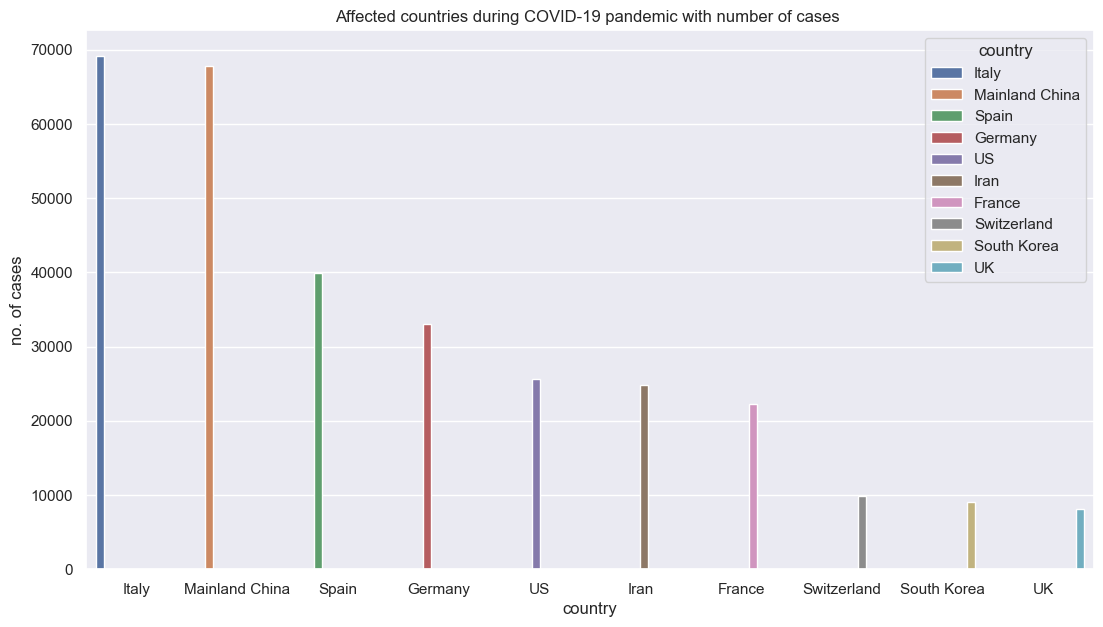

In [16]:
# Create a bar chart to visualize the data
sns.set(rc={'figure.figsize':(13,7)})
sns.barplot(x="country",y="no. of cases", data=top_country_confirmed,hue="country")
plt.title('Affected countries during COVID-19 pandemic with number of cases ')
plt.show()

# (i) Which is the highest affected area and what  is the number of cases group from the model, the second highest affected area along with number ?

### The highest affected area and its number of cases are as follow :

In [17]:
# Get the highest affected area and its number of cases
highest_affected_area = sorted_data.iloc[0]['country']
highest_affected_number = sorted_data.iloc[0]['no. of cases']

# Get the second highest affected area and its number of cases
second_highest_affected_area = sorted_data.iloc[1]['country']
second_highest_affected_number = sorted_data.iloc[1]['no. of cases']

# Print the highest and second highest affected areas with their respective numbers
print(f"Highest affected area: {highest_affected_area}, Number of cases: {highest_affected_number}")

Highest affected area: Italy, Number of cases: 69176


### The Second highest affected area and its number of cases are as follow :

In [18]:
print(f"Second highest affected area: {second_highest_affected_area}, Number of cases: {second_highest_affected_number}")


Second highest affected area: Mainland China, Number of cases: 67801


# Highest affected area: Italy

In [19]:
italy = covid[covid.country=="Italy"]

In [20]:
max_number_of_cases = italy.sort_values(by='no. of cases',ascending=False)

In [21]:
max_number_of_cases.head(10)

,date,country,no. of cases,deaths,recovered
8285,2020-03-24,Italy,69176,6820,8326
7989,2020-03-23,Italy,63927,6077,7432
7691,2020-03-22,Italy,59138,5476,7024
7314,2020-03-21,Italy,53578,4825,6072
7015,2020-03-20,Italy,47021,4032,4440
6723,2020-03-19,Italy,41035,3405,4440
6439,2020-03-18,Italy,35713,2978,4025
6163,2020-03-17,Italy,31506,2503,2941
5891,2020-03-16,Italy,27980,2158,2749
5633,2020-03-15,Italy,24747,1809,2335


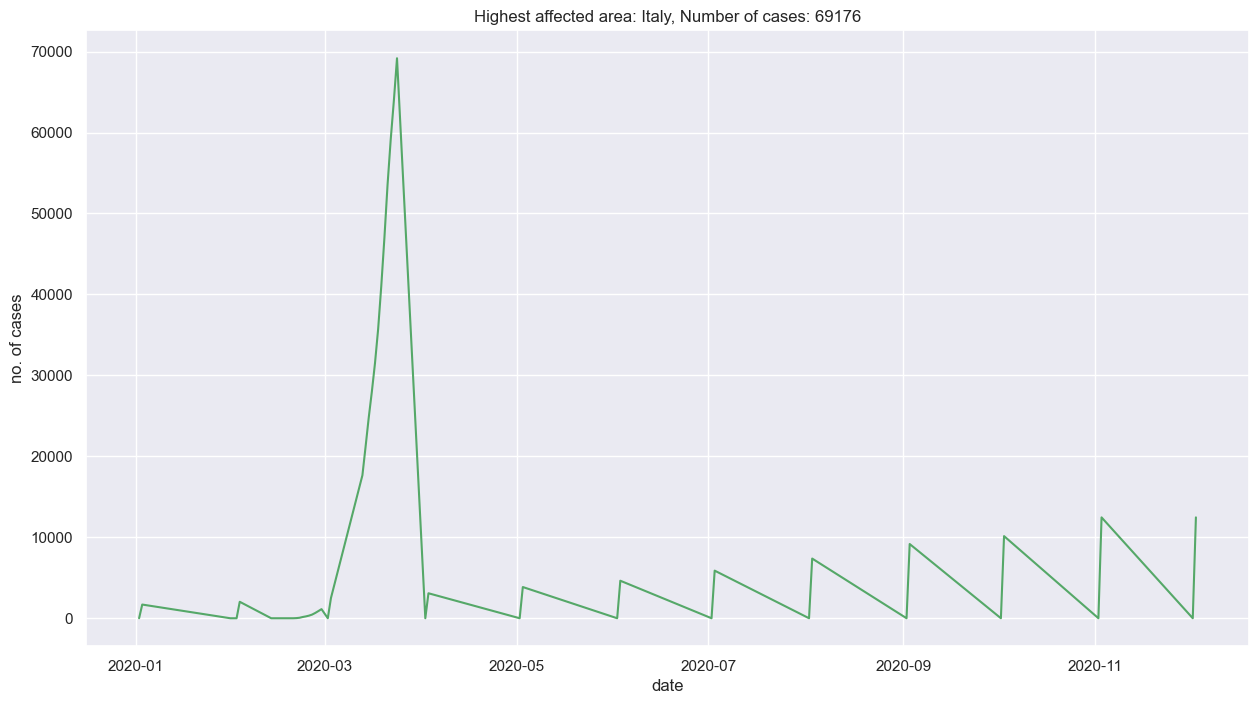

In [22]:
sns.set(rc={'figure.figsize':(15,8)})
sns.lineplot(x="date",y="no. of cases", data=italy,color="g")
plt.title('Highest affected area: Italy, Number of cases: 69176')
plt.show()

#  Second highest affected area: Mainland China

In [23]:
china = covid[covid.country=="Mainland China"]

In [24]:
max_number_of_cases = china.sort_values(by='no. of cases',ascending=False)

In [25]:
max_number_of_cases.head(10)

,date,country,no. of cases,deaths,recovered
8420,2020-03-24,Mainland China,67801,3160,60324
7014,2020-03-20,Mainland China,67800,3133,58382
6438,2020-03-18,Mainland China,67800,3122,56927
8123,2020-03-23,Mainland China,67800,3153,59882
7313,2020-03-21,Mainland China,67800,3139,58946
7826,2020-03-22,Mainland China,67800,3144,59433
6722,2020-03-19,Mainland China,67800,3130,57682
6162,2020-03-17,Mainland China,67799,3111,56003
5890,2020-03-16,Mainland China,67798,3099,55142
5632,2020-03-15,Mainland China,67794,3085,54288


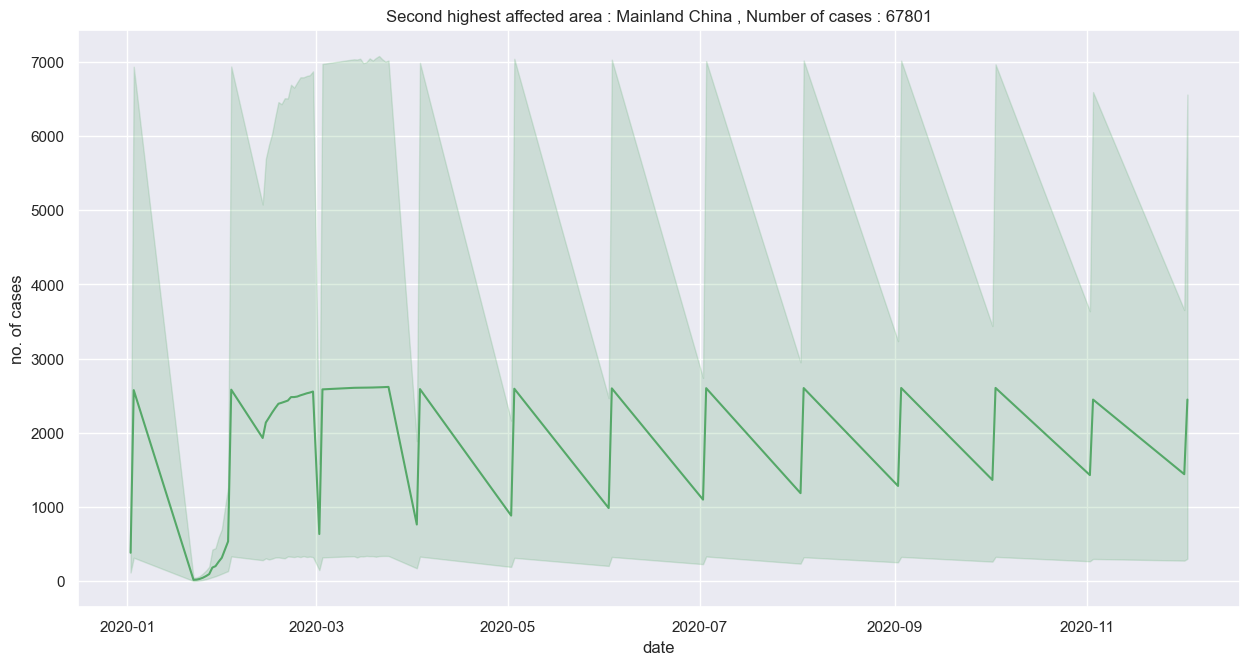

In [26]:
sns.set(rc={'figure.figsize':(15,7.5)})
sns.lineplot(x="date",y="no. of cases", data=china,color="g")
plt.title('Second highest affected area : Mainland China , Number of cases : 67801')
plt.show()

# (ii) What is the mortality Vs. recovery   ratio.

In [27]:
total_deaths =covid['deaths'].sum()
print("Total deaths :" ,total_deaths)

Total deaths : 217345


In [28]:
recovery_counts =covid['recovered']
total_recoveries =recovery_counts.sum()
print("Total recoveries :" ,total_recoveries)

Total recoveries : 2091413


In [29]:
total_cases = total_deaths+total_recoveries
print("Total cases :" ,total_cases)

Total cases : 2308758


#### Mortality ratio = (total deaths / total cases)*100

In [30]:
mortality_ratio = (total_deaths / total_cases)*100
print("Mortality Ratio: {:.2f}%".format(mortality_ratio))

Mortality Ratio: 9.41%


#### Recovery ratio = (total recoveries / total cases)*100

In [31]:
recovery_ratio = (total_recoveries / total_cases)*100
print("Recovery Ratio: {:.2f}%".format(recovery_ratio))

Recovery Ratio: 90.59%


#### Mortality versus Recovery Ratio =  (Mortality ratio)  / (Recovery ratio)

In [32]:
mortality_recovery_ratio =mortality_ratio / recovery_ratio
print(" Mortality versus Recovery Ratio: {:.2f}%".format(mortality_recovery_ratio))

 Mortality versus Recovery Ratio: 0.10%


# Distribution of Number of cases across different Age Groups and Genders
### Load & Read the data set COVID19_line_list_data_modified (1).csv
Clean, filter and Load data as necessary for analysis - 2nd CSV file

In [33]:
# read the COVID19_line_list_data_modified (1) CSV file
data.head()

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom
0,1,NaN,2020-01-20,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,2020-03-01,0.0,1/11/2020,12/29/2019,1/4/2020,1,0.0,0,0,NaN
1,2,NaN,2020-01-20,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,2020-01-15,0.0,1/15/2020,NaN,1/12/2020,0,1.0,0,0,NaN
2,3,NaN,2020-01-21,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,2020-04-01,0.0,1/17/2020,NaN,1/3/2020,0,1.0,0,0,NaN
3,4,NaN,2020-01-21,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaT,NaN,1/19/2020,NaN,NaN,1,0.0,0,0,NaN
4,5,NaN,2020-01-21,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaT,NaN,1/14/2020,NaN,NaN,0,0.0,0,0,NaN


# Cleaning the data frame by choosing the appropriate columns                          necessary for the analysis 
convert the columns that necessary for analysis :

In [34]:
# Clean, filter and Load data as necessary for analysis - 2nd CSV file
data = data[['case_in_country','reporting date','country','gender','age','death']]
data.columns = ['no. of cases','date','Area','gender','age','death']

#### Dataframe after cleaning
head data upto starting 10 lines

In [35]:
data.head(10)

,no. of cases,date,Area,gender,age,death
0,NaN,2020-01-20,China,male,66.0,0
1,NaN,2020-01-20,China,female,56.0,0
2,NaN,2020-01-21,China,male,46.0,0
3,NaN,2020-01-21,China,female,60.0,0
4,NaN,2020-01-21,China,male,58.0,0
5,NaN,2020-01-21,China,female,44.0,0
6,NaN,2020-01-21,China,male,34.0,0
7,NaN,2020-01-21,China,male,37.0,0
8,NaN,2020-01-21,China,male,39.0,0
9,NaN,2020-01-21,China,male,56.0,0


In [36]:
# head data upto starting 10 lines
data.tail(10)

,no. of cases,date,Area,gender,age,death
1075,14.0,2020-02-25,Bahrain,male,NaN,0
1076,15.0,2020-02-25,Bahrain,male,NaN,0
1077,16.0,2020-02-25,Bahrain,female,NaN,0
1078,17.0,2020-02-25,Bahrain,female,NaN,0
1079,1.0,2020-02-25,Austria,NaN,24.0,0
1080,2.0,2020-02-25,Austria,NaN,24.0,0
1081,1.0,2020-02-24,Afghanistan,NaN,35.0,0
1082,1.0,2020-02-26,Algeria,male,NaN,0
1083,1.0,2020-02-25,Croatia,male,NaN,0
1084,1.0,2020-02-25,Switzerland,male,70.0,0


In [37]:
today = data[data.date=='2020-02-25']

# (iii) Is there any general tendency towards particular age, gender or random?

### There is no general tendency towards a particular age or gender. However, older, adults and                                        people with underlying medical conditions are at higher risk of developing severe illness from COVID-19

###  Here are some general observations based on available data:

### AGE:

Older individuals, particularly those above (55-65) years, are generally at higher risk of severe illness and mortality from COVID-19 compared to younger age groups. However, it is important to note that severe cases and fatalities can occur in individuals of any age, including younger individuals with underlying health conditions.

### GENDER:

The available data suggests that males may be more susceptible to severe cases of COVID-19 compared to females. The reasons for this gender disparity are still being investigated and could be influenced by a combination of biological, genetic, and behavioral factors.

# Bar chart for age distribution
 Analyze tendencies based on age , from the table as shown below :

In [38]:
# Analyze tendencies based on age
max_age = today.sort_values(by='age',ascending=False)

In [39]:
max_age.head(10)

,no. of cases,date,Area,gender,age,death
380,145.0,2020-02-25,Japan,female,75.0,0
381,146.0,2020-02-25,Japan,female,75.0,0
1084,1.0,2020-02-25,Switzerland,male,70.0,0
655,925.0,2020-02-25,South Korea,female,69.0,0
375,140.0,2020-02-25,Japan,male,65.0,0
377,142.0,2020-02-25,Japan,female,65.0,0
378,143.0,2020-02-25,Japan,female,65.0,0
210,14.0,2020-02-25,France,male,63.0,0
955,85.0,2020-02-25,Hong Kong,female,60.0,0
540,91.0,2020-02-25,Singapore,female,58.0,0


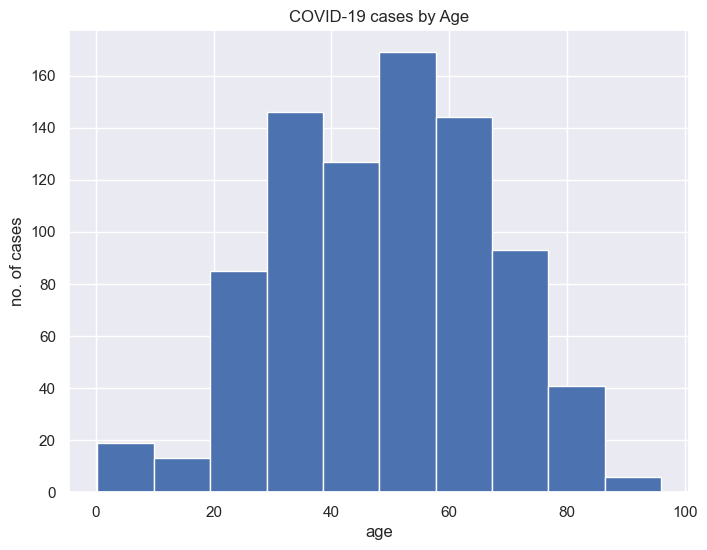

In [40]:
# create a bar chart for age distribution
filtered_data =data
plt.figure(figsize =(8,6))
plt.hist(filtered_data['age'])
plt.xlabel('age')
plt.ylabel('no. of cases')
plt.title('COVID-19 cases by Age')
plt.show()

# pie chart for gender distribution
 Analyze tendencies based on gender , from the table as shown below :

In [41]:
# Analyze tendencies based on gender
max_gender_cases = today.sort_values(by='gender',ascending=False)

In [42]:
max_gender_cases.head(10)

,no. of cases,date,Area,gender,age,death
1084,1.0,2020-02-25,Switzerland,male,70.0,0
1075,14.0,2020-02-25,Bahrain,male,NaN,0
1002,7.0,2020-02-25,Spain,male,31.0,0
210,14.0,2020-02-25,France,male,63.0,0
954,84.0,2020-02-25,Hong Kong,male,24.0,0
952,82.0,2020-02-25,Hong Kong,male,33.0,0
727,37.0,2020-02-25,Thailand,male,29.0,0
1074,13.0,2020-02-25,Bahrain,male,NaN,0
687,31.0,2020-02-25,Taiwan,male,NaN,0
1076,15.0,2020-02-25,Bahrain,male,NaN,0


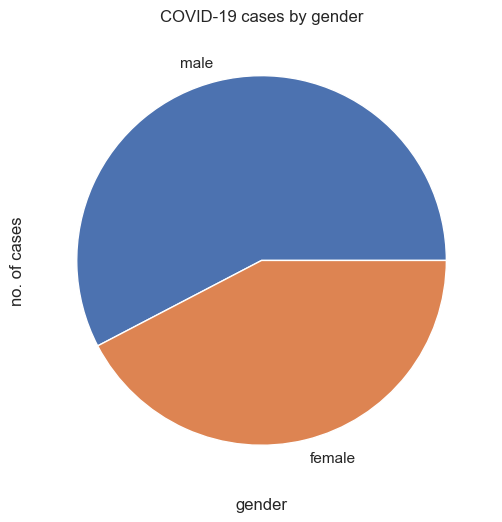

In [43]:
# create a pie chart for gender distribution 
plt.figure(figsize =(8,6))
filtered_data['gender'].value_counts().plot(kind='pie')
plt.xlabel('gender')
plt.ylabel('no. of cases')
plt.title('COVID-19 cases by gender')
plt.show()

#  (iv) What is the mortality rate among different age groups?

1. Group the data by age and calculate the total number of cases and deaths.

2. Calculate the mortality rate for each age group.
  
   mortality rate = total death/ total number of cases
    
3. Sort the age groups by mortality rate in descending order.

In [44]:
# Convert 'no. of cases' and 'death' columns to numeric
data['no. of cases'] = pd.to_numeric(data['no. of cases'], errors='coerce')
data['death'] = pd.to_numeric(data['death'], errors='coerce')

In [45]:
#Group the data by age and calculate the total number of cases and deaths

age_group_totals = data.groupby('age').agg({'no. of cases': 'sum', 'death' : 'sum'}).reset_index()

In [46]:
# Calculate the mortality rate for each age group

age_group_totals['Mortality Rate'] = np.where(age_group_totals['no. of cases']==0,0, (age_group_totals['death']/age_group_totals['no. of cases']))

In [47]:
# Sort the age groups by mortality rate in descending order

sorted_age_group_totals = age_group_totals.sort_values(by= 'Mortality Rate', ascending=False)

In [48]:
sorted_age_group_totals.head(10)

,age,no. of cases,death,Mortality Rate
76,82.0,29.0,3.0,0.103448
75,81.0,29.0,2.0,0.068966
60,66.0,82.0,4.0,0.048780
80,86.0,41.0,1.0,0.024390
82,89.0,93.0,2.0,0.021505
67,73.0,60.0,1.0,0.016667
73,79.0,68.0,1.0,0.014706
64,70.0,290.0,4.0,0.013793
61,67.0,175.0,2.0,0.011429
66,72.0,106.0,1.0,0.009434


In [49]:
top_age_group = sorted_age_group_totals[0:10]

## visualize the mortality rate among different age groups using -  Bar chart

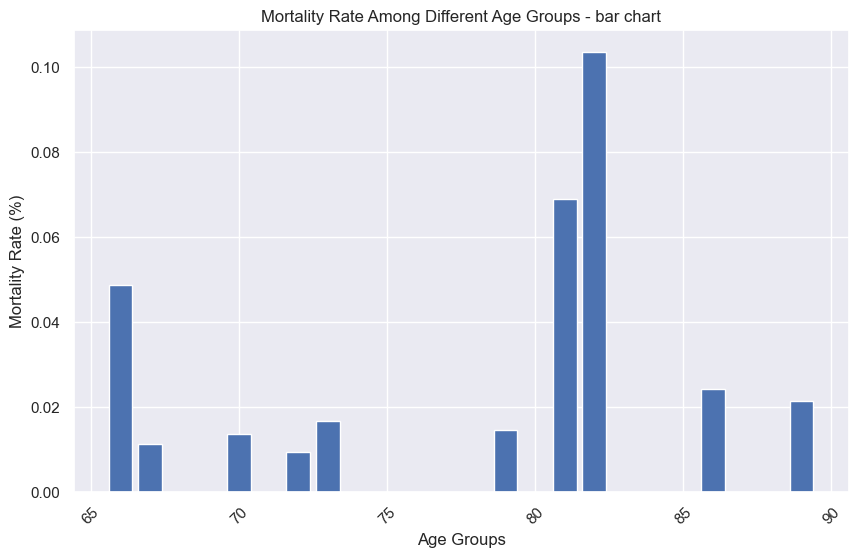

In [50]:
# Bar chart for mortality rate by age groups
plt.figure(figsize=(10, 6))
plt.bar(top_age_group['age'], top_age_group['Mortality Rate'])
plt.xlabel('Age Groups')
plt.ylabel('Mortality Rate (%)')
plt.title('Mortality Rate Among Different Age Groups - bar chart')
plt.xticks(rotation=45)
plt.show()

## visualize the mortality rate among different age groups using - Pie chart

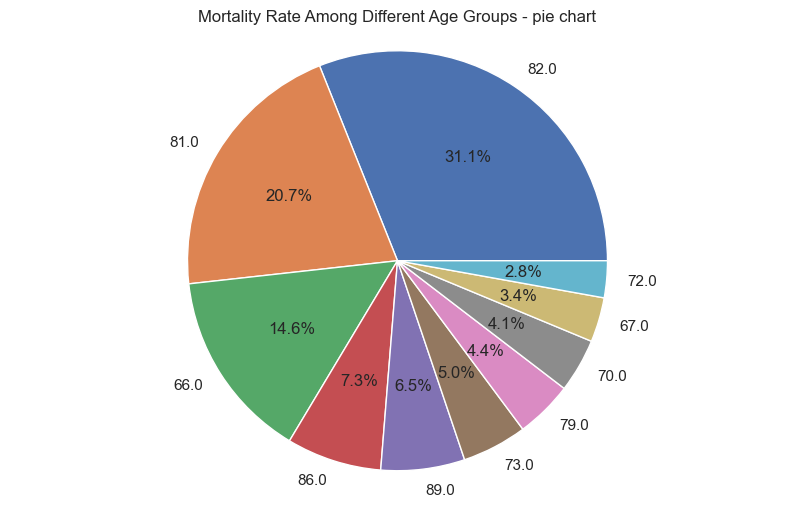

In [51]:
plt.figure(figsize=(10,6))
plt.pie(top_age_group['Mortality Rate'], labels=top_age_group['age'], autopct='%1.1f%%')
plt.title('Mortality Rate Among Different Age Groups - pie chart')
plt.axis('equal')
plt.show()

##  visualize the mortality rate over different age groups using - Line chart

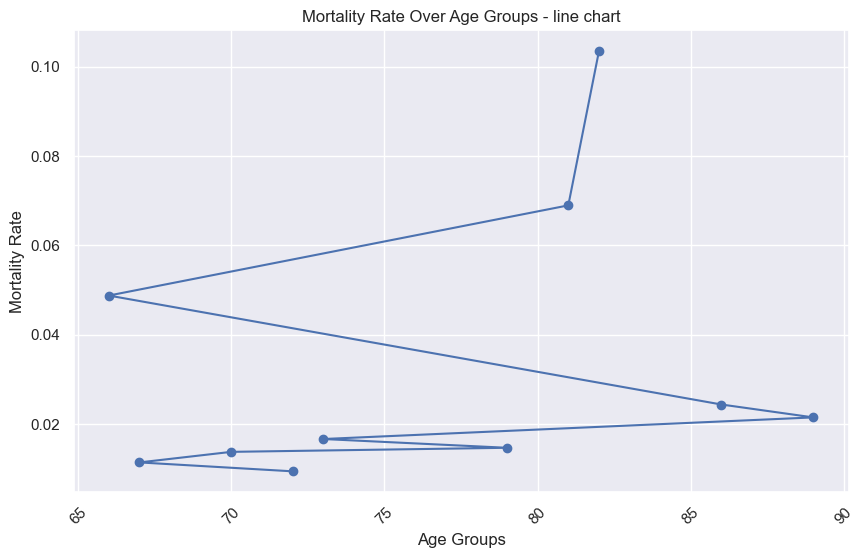

In [52]:
# Line chart for mortality rate over different age groups
plt.figure(figsize=(10, 6))
plt.plot(top_age_group['age'], top_age_group['Mortality Rate'], marker='o')
plt.xlabel('Age Groups')
plt.ylabel('Mortality Rate')
plt.title('Mortality Rate Over Age Groups - line chart')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()